In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [51]:
os.chdir('/content/gdrive/MyDrive/EDA Movie Analysis')

In [52]:
os.listdir()

['ratings_small.csv',
 'movies_metadata.csv',
 'movies_metadata.gsheet',
 'Movie Analysis.ipynb']

In [53]:
movies_data = pd.read_csv('movies_metadata.csv')

In [54]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

## **Data Cleaning**

Fill Missing Values

In [55]:
movies_data.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


In [56]:
(movies_data.isnull().sum() / len(movies_data)) * 100

,0
adult,0.000000
belongs_to_collection,90.121637
budget,0.000000
genres,0.000000
homepage,82.889383
id,0.000000
imdb_id,0.037393
original_language,0.024195
original_title,0.000000
overview,2.098410


In [57]:
#remove column with missing values >50%
threshold = 0.5
# Dropping columns with more than 50% missing values
movies_data = movies_data.dropna(thresh=len(movies_data) * threshold, axis=1)

In [58]:
# Fill missing 'revenue' and 'runtime' with their respective medians
for col in ['revenue', 'runtime']:
    median_value = movies_data[col].median()
    movies_data[col].fillna(median_value, inplace=True)

# Fill missing 'imdb_id' , 'original_language' , 'popularity' , 'spoken_languages' , 'status' with their respective means
# Note: It might not make sense to fill categorical features ('imdb_id', 'original_language', 'spoken_languages', 'status') with the mean.
# You might consider using the mode (most frequent value) for these instead, or a more sophisticated imputation technique.
for col in ['popularity', 'vote_average', 'vote_count']:
  mean_value = movies_data[col].mean()
  movies_data[col].fillna(mean_value, inplace=True)

for col in ['imdb_id', 'original_language', 'spoken_languages', 'status']:
    mode_value = movies_data[col].mode()[0] # Use mode for categorical features
    movies_data[col].fillna(mode_value, inplace=True)

<ipython-input-58-ef6b98b02a0c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_data[col].fillna(median_value, inplace=True)
<ipython-input-58-ef6b98b02a0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data[col].fillna(median_value, inplace=True)
<ipython-input-58-ef6b98b02a0c>:11: FutureWarning: A value is trying to be set 

In [59]:
# Convert 'release_date' to datetime objects, handling errors
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])

# Calculate the median of valid 'release_date' values
release_date_median = movies_data['release_date'].quantile(0.5)

# Fill missing 'release_date' values with the median
movies_data['release_date'].fillna(release_date_median, inplace=True)

<ipython-input-59-7f3e328619dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
<ipython-input-59-7f3e328619dd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_data['release_date'].fillna(release_date_medi

In [60]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45463 non-null  bool          
 1   budget                45463 non-null  int64         
 2   genres                45463 non-null  object        
 3   id                    45463 non-null  int64         
 4   imdb_id               45463 non-null  object        
 5   original_language     45463 non-null  object        
 6   original_title        45463 non-null  object        
 7   overview              44509 non-null  object        
 8   popularity            45463 non-null  float64       
 9   poster_path           45077 non-null  object        
 10  production_companies  45460 non-null  object        
 11  production_countries  45460 non-null  object        
 12  release_date          45463 non-null  datetime64[ns]
 13  revenue         

Remove Duplicate Data

In [61]:
# Remove Duplicate Data
movies_data.duplicated().sum()
movies_data.drop_duplicates(inplace=True)
movies_data.duplicated().sum()

0

Change release_date

In [62]:
movies_data['release_date'].dtypes

dtype('<M8[ns]')

In [63]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45446 entries, 0 to 45462
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45446 non-null  bool          
 1   budget                45446 non-null  int64         
 2   genres                45446 non-null  object        
 3   id                    45446 non-null  int64         
 4   imdb_id               45446 non-null  object        
 5   original_language     45446 non-null  object        
 6   original_title        45446 non-null  object        
 7   overview              44492 non-null  object        
 8   popularity            45446 non-null  float64       
 9   poster_path           45060 non-null  object        
 10  production_companies  45443 non-null  object        
 11  production_countries  45443 non-null  object        
 12  release_date          45446 non-null  datetime64[ns]
 13  revenue              

## **Exploratory Data Analysis (EDA)**

Text(0, 0.5, 'Frequency')

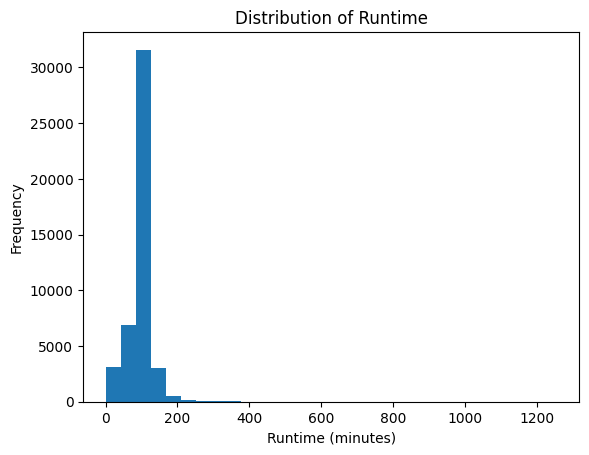

In [64]:
# Plotting the distribution of the 'runtime' column
movies_data['runtime'].dropna().plot(kind='hist', bins=30)

# Set the Title and label
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

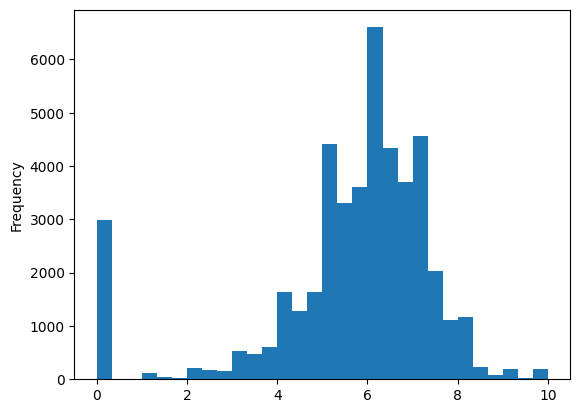

In [65]:
# Plotting the distribution of the 'runtime' column
movies_data['vote_average'].dropna().plot(kind='hist', bins=30)

<Axes: ylabel='Frequency'>

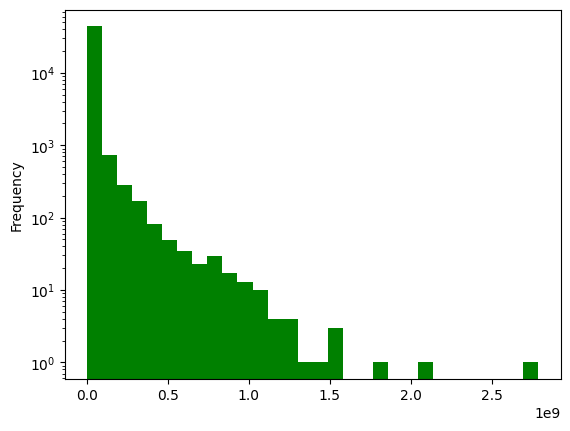

In [66]:
# Plotting the distribution of the 'revenue' column
movies_data['revenue'].dropna().plot(kind='hist', bins=30, color='green', log=True)


--- Distribution Analysis for 'runtime' ---
count    45446.000000
mean        94.131233
std         38.302481
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


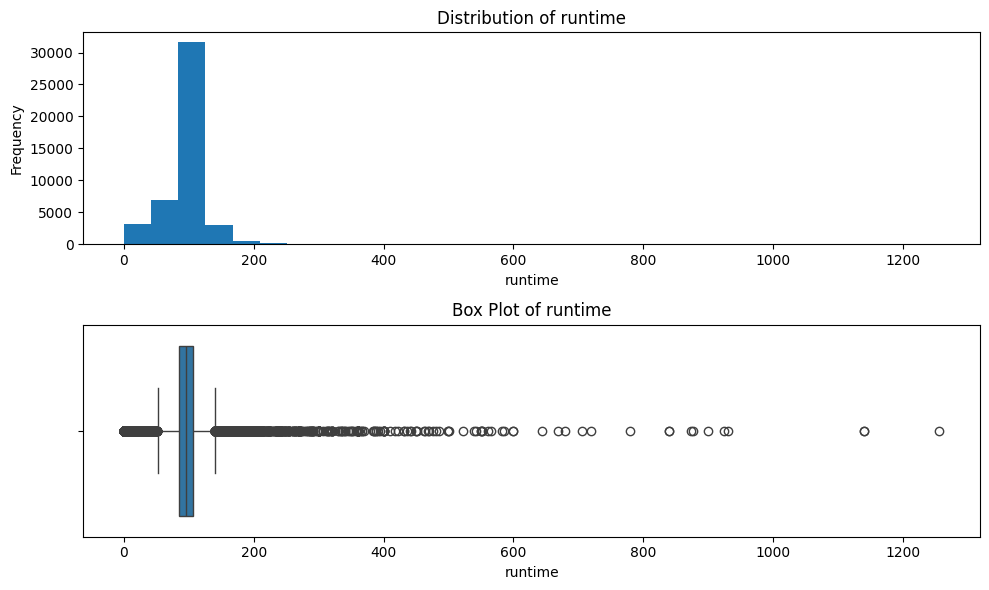


--- Distribution Analysis for 'vote_average' ---
count    45446.000000
mean         5.618311
std          1.924028
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64


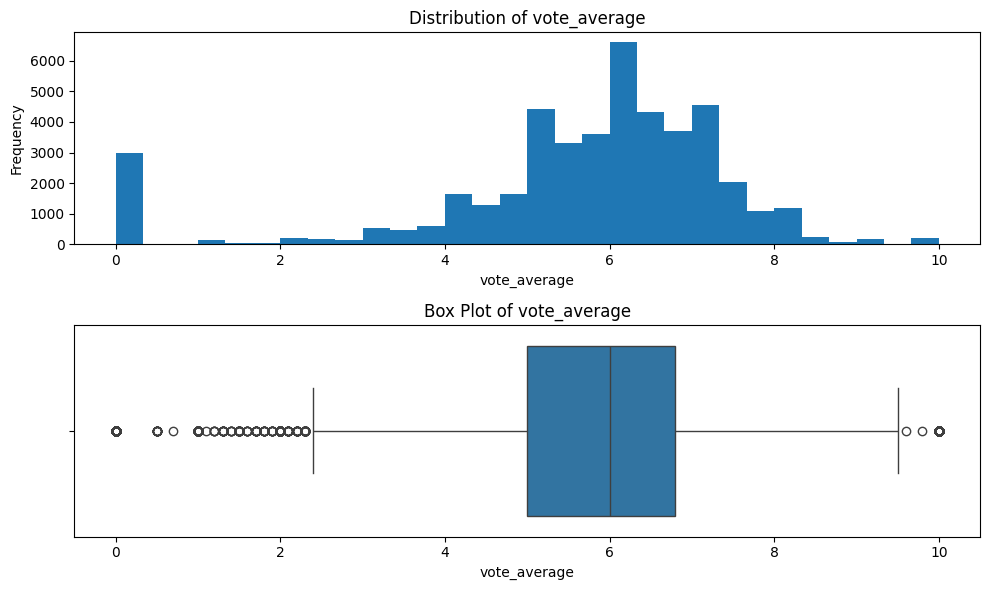


--- Distribution Analysis for 'revenue' ---
count    4.544600e+04
mean     1.121276e+07
std      6.434186e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


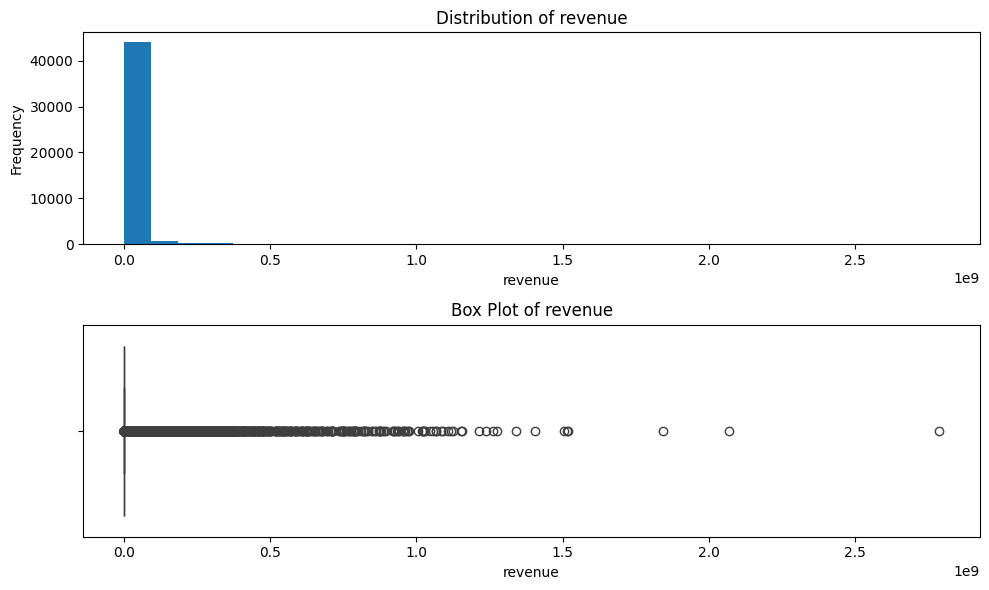


--- Distribution Analysis for 'popularity' ---
count    45446.000000
mean         2.921510
std          6.005908
min          0.000000
25%          0.386080
50%          1.127782
75%          3.678685
max        547.488298
Name: popularity, dtype: float64


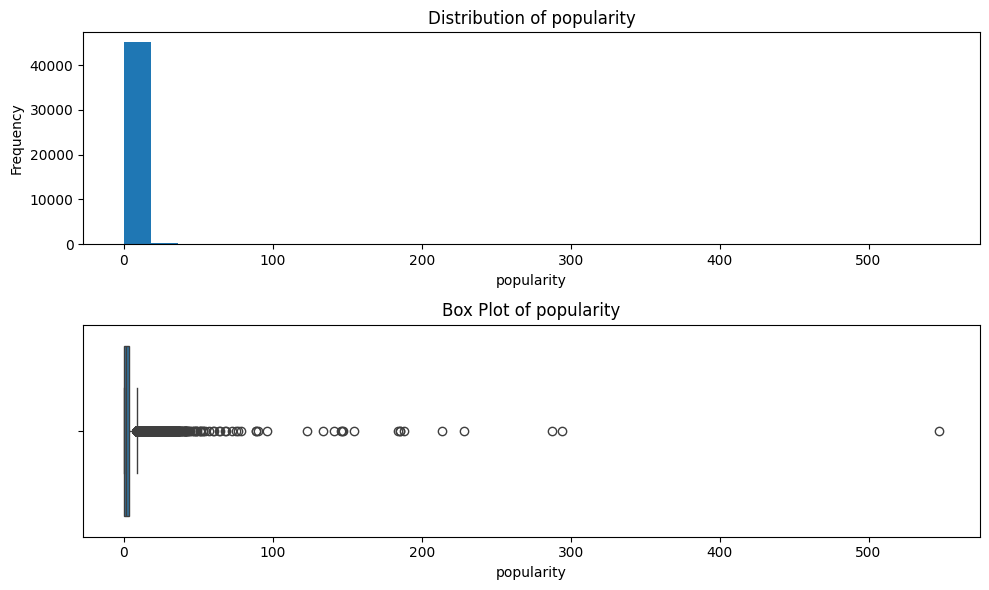


--- Distribution Analysis for 'vote_count' ---
count    45446.000000
mean       109.922209
std        491.382148
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


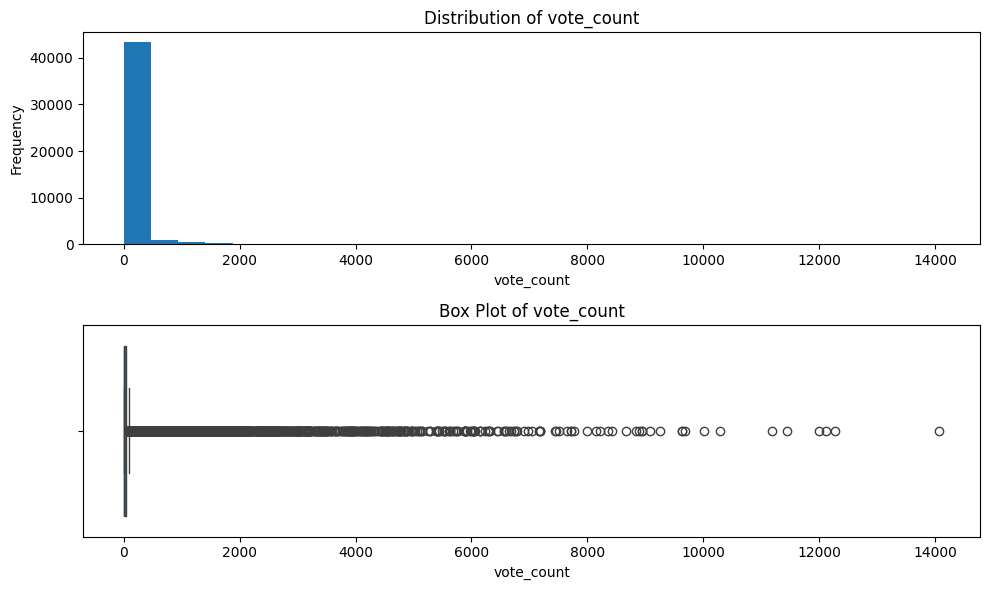

In [68]:
# Detailed information and distribution analysis for numerical columns
numerical_cols = ['runtime', 'vote_average', 'revenue', 'popularity', 'vote_count']

for col in numerical_cols:
    print(f"\n--- Distribution Analysis for '{col}' ---")
    print(movies_data[col].describe())  # Summary statistics

    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

    # Histogram
    plt.subplot(2, 1, 1)
    movies_data[col].plot(kind='hist', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot (to show outliers)
    plt.subplot(2, 1, 2)
    sns.boxplot(x=movies_data[col])  # Using seaborn for a more informative box plot
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

### **Analyzing Relationships Between Columns**

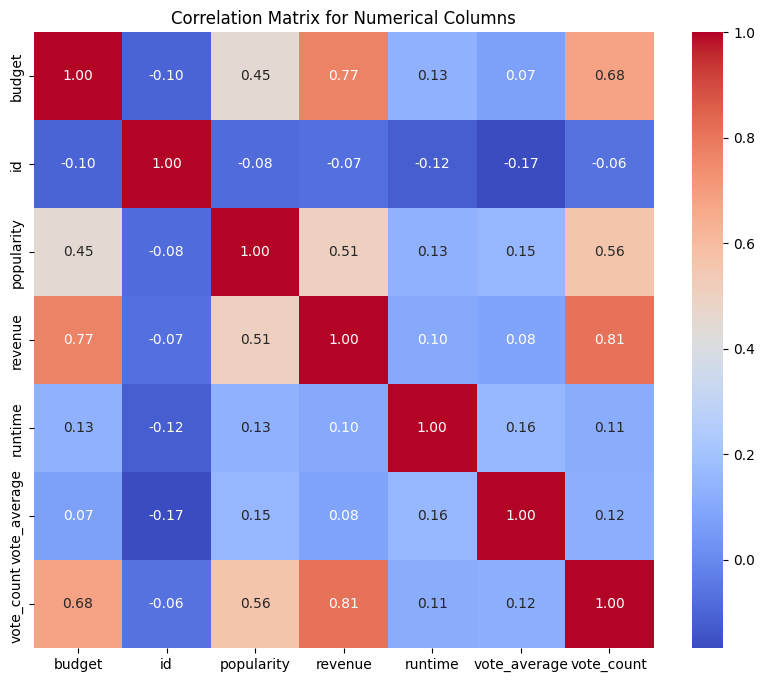

In [73]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
numerical_columns = movies_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = movies_data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

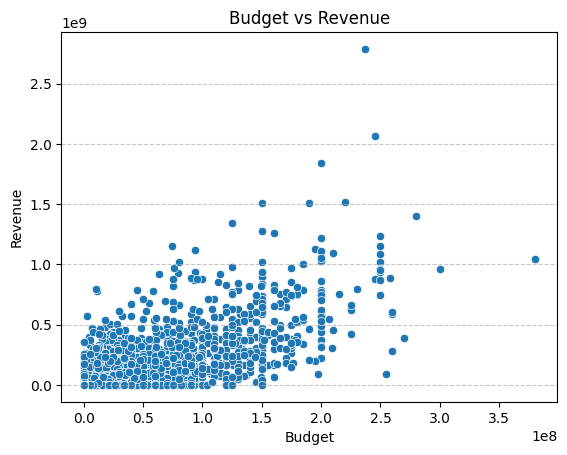

In [88]:
# Correlation Between Budget & Revenue
sns.scatterplot(x='budget', y='revenue', data=movies_data)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

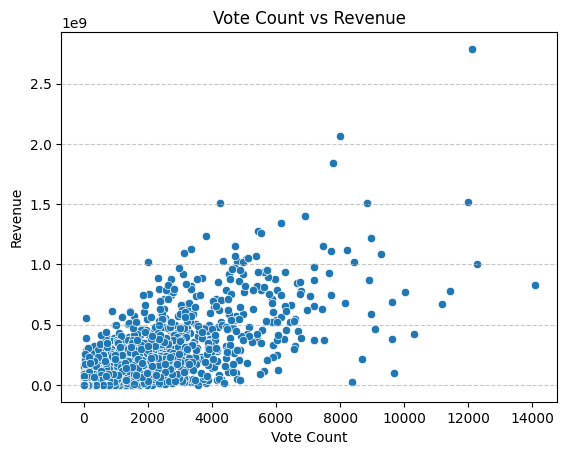

In [89]:
# Correlation Between vote_count & revenue
sns.scatterplot(x='vote_count', y='revenue', data=movies_data)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Analyze by Genre**

In [91]:
# Extract genre names from the genres column in JSON-like string form
import ast #is used for working with Abstract Syntax Trees, like JSON
movies_data['genres'] = movies_data['genres'].apply(
    lambda x: [genre['name'] for genre in ast.literal_eval(x)] if isinstance(x, str) else []
)

# Separate genres into separate lines
movies_by_genre = movies_data.explode('genres')

# Calculate average votes and total revenue by genre
genre_analysis = movies_by_genre.groupby('genres').agg({
    'vote_average': 'mean',
    'revenue': 'sum'
}).sort_values(by='revenue', ascending=False)

print(genre_analysis)

                 vote_average       revenue
genres                                     
Action               5.585005  2.014565e+11
Adventure            5.687521  2.001193e+11
Comedy               5.715784  1.668959e+11
Drama                5.905654  1.608423e+11
Thriller             5.616129  1.298215e+11
Family               5.753394  1.072352e+11
Fantasy              5.790826  1.040347e+11
Science Fiction      5.344595  9.791478e+10
Romance              5.803639  7.350666e+10
Animation            6.274764  6.752968e+10
Crime                5.877938  6.341964e+10
Mystery              5.819757  3.475461e+10
Horror               5.230526  3.083709e+10
War                  6.041119  1.591046e+10
History              6.154220  1.490220e+10
Music                5.879599  1.337029e+10
Western              5.167179  5.122499e+09
Documentary          5.823302  1.449529e+09
Foreign              5.736235  2.916333e+08
TV Movie             5.236790  4.200000e+07


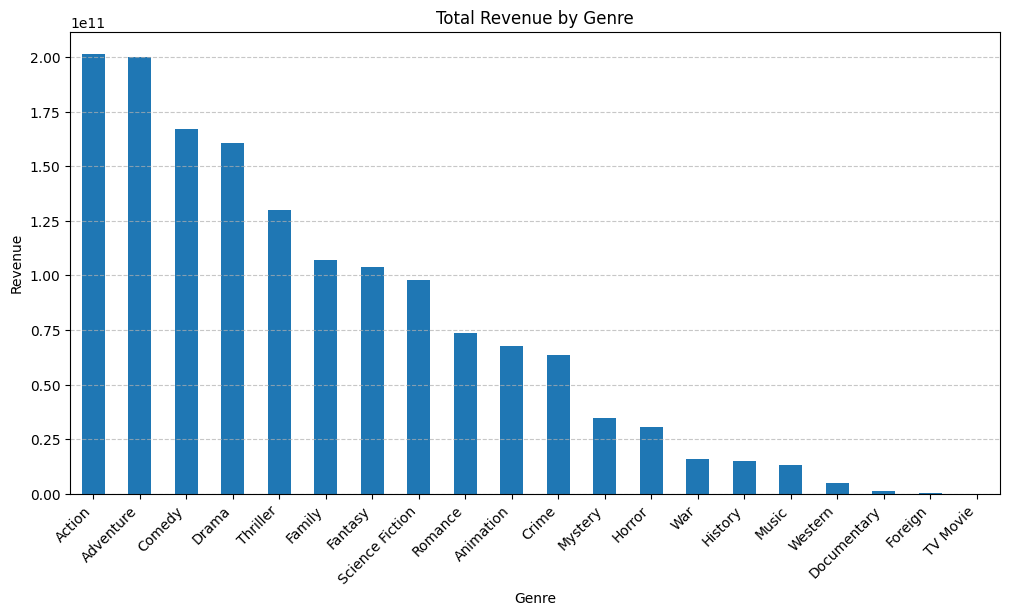

In [92]:
# Visualization of Total Revenue by Genre
plt.figure(figsize=(12, 6))
genre_analysis['revenue'].plot(kind='bar')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

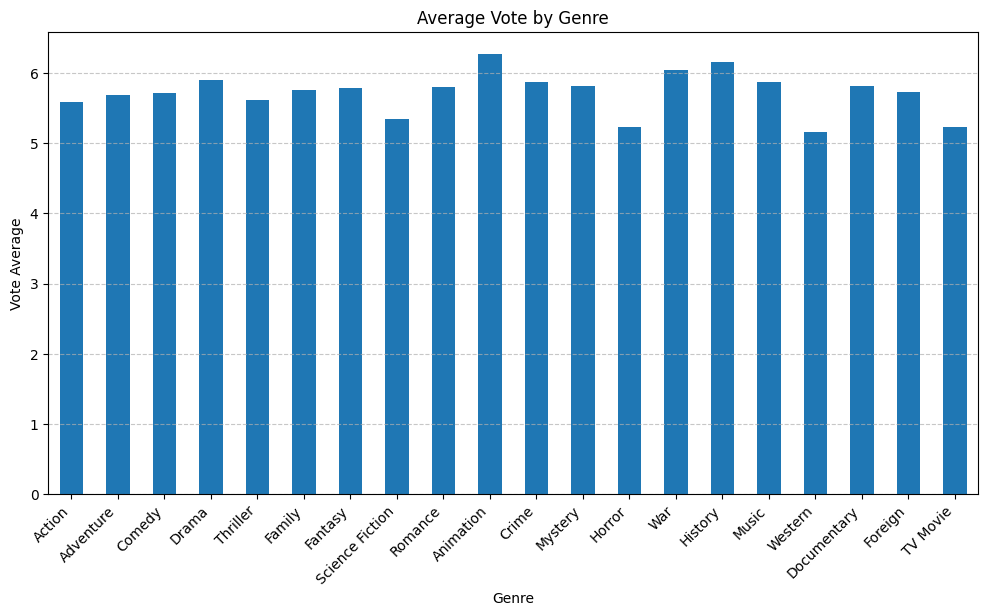

In [94]:
# Visualization of Average Ratings by Genre
plt.figure(figsize=(12, 6))
genre_analysis['vote_average'].plot(kind='bar')
plt.title('Average Vote by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Finding Best Movies (Combining Rating and Revenue)**

In [98]:
# Revenue Normalization
movies_data['normalized_revenue'] = movies_data['revenue'] / movies_data['revenue'].max()

In [99]:
# Combining Rating and Revenue
movies_data['success_metric'] = movies_data['normalized_revenue'] + movies_data['vote_average']

In [100]:
# Choose the Best Movie
top_movies = movies_data[['title', 'vote_average', 'revenue', 'success_metric']].sort_values(by='success_metric', ascending=False).head(10)
print(top_movies)

                                           title  vote_average   revenue  \
1761                       Dancer, Texas Pop. 81          10.0  565592.0   
22376                                  The Guide          10.0       0.0   
20801                    The Taming of the Shrew          10.0       0.0   
37418                                     Mother          10.0       0.0   
1634                    Other Voices Other Rooms          10.0       0.0   
15710  If God Is Willing and da Creek Don't Rise          10.0       0.0   
37387               A Story of the Forest: Mavka          10.0       0.0   
42435              Has the Film Already Started?          10.0       0.0   
22345                             هیچ کجا هیچ کس          10.0       0.0   
32438                                  Butterfly          10.0       0.0   

       success_metric  
1761        10.000203  
22376       10.000000  
20801       10.000000  
37418       10.000000  
1634        10.000000  
15710       10.0000

As you can see, the top 10 best films show 0 revenue, which could indicate that their revenue data is missing or they are not commercial films.

Next, Improve Success Metric Calculation:

In [101]:
movies_data['success_metric'] = (0.7 * movies_data['normalized_revenue']) + (0.3 * movies_data['vote_average'])

In [102]:
#Filter Movies with Revenue > 0
filtered_movies = movies_data[movies_data['revenue'] > 0]

In [103]:
# Choose the Best Movie (Filter Movies with Revenue > 0)
top_movies = filtered_movies[['title', 'vote_average', 'revenue', 'success_metric']].sort_values(by='success_metric', ascending=False).head(10)
print(top_movies)

                                               title  vote_average  \
1761                           Dancer, Texas Pop. 81          10.0   
14551                                         Avatar           7.2   
20529           Lenny Bruce: Swear to Tell the Truth           9.5   
26554                   Star Wars: The Force Awakens           7.5   
10309                    Dilwale Dulhania Le Jayenge           9.1   
12481                                The Dark Knight           8.3   
1639                                         Titanic           7.5   
7000   The Lord of the Rings: The Return of the King           8.1   
17437   Harry Potter and the Deathly Hallows: Part 2           7.9   
34922                          Katyar Kaljat Ghusali           9.0   

            revenue  success_metric  
1761   5.655920e+05        3.000142  
14551  2.787965e+09        2.860000  
20529  2.135000e+04        2.850005  
26554  2.068224e+09        2.769288  
10309  1.000000e+08        2.755108  
1

### **Conclusion**
We can conclude that the **Top 10 Movies**, based on `vote_average`, `revenue`, and `success_metric`, are:

1. **Dancer, Texas Pop. 81** - Vote Average: 10.0  
2. **Avatar** - Vote Average: 7.2  
3. **Lenny Bruce: Swear to Tell the Truth** - Vote Average: 9.5  
4. **Star Wars: The Force Awakens** - Vote Average: 7.5  
5. **Dilwale Dulhania Le Jayenge** - Vote Average: 9.1  
6. **The Dark Knight** - Vote Average: 8.3  
7. **Titanic** - Vote Average: 7.5  
8. **The Lord of the Rings: The Return of the King** - Vote Average: 8.1  
9. **Harry Potter and the Deathly Hallows: Part 2** - Vote Average: 7.9  
10. **Katyar Kaljat Ghusali** - Vote Average: 9.0  

These movies represent the **best films** based on their ratings and financial success.